###Import of Libraries

In [1]:
import pandas as pd
import io
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import LocallyLinearEmbedding
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
uploaded = files.upload()

Saving crabs.csv to crabs.csv


### Initial Study of the Dataset

In [3]:
crabs_data = pd.read_csv("crabs.csv")
# Rename the columns
crabs_data = crabs_data.rename(columns={'sp':'species','FL':'Frontal Lobe','RW':'Rear Width','CL':'Carapace Midline',
                                        'CW':'Maximum Width','BD':'Body Depth'})

crabs_data['species'] = crabs_data['species'].map({'B':'Blue','O':'Orange'})
crabs_data['sex'] = crabs_data['sex'].map({'M':'Male','F':'Female'})


In [4]:
crabs_data.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2


The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (male/female) and species (blue/orange).

In [5]:
crabs_data['class'] = crabs_data.species + crabs_data.sex
crabs_data['class'].value_counts()

BlueMale        50
BlueFemale      50
OrangeMale      50
OrangeFemale    50
Name: class, dtype: int64

## Locally Linear Embedding

In [6]:
data_columns =['Frontal Lobe',	'Rear Width'	,'Carapace Midline'	,'Maximum Width',	'Body Depth']

This method projects the data into a lower dimensional space trying to preserve the distances between neighbors.

So this method is based on local distances. When we work with distances it is important that all variables have the same range. Otherwise, a variable with large values could confuse the model.

To avoid these problems we will use the MinMaxScaler this time.

It Transforms features by scaling each feature to a given **range**.

In [7]:
crabs_min_max = crabs_data.copy()
crabs_min_max[data_columns] = MinMaxScaler().fit_transform(crabs_data[data_columns])

In [8]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale


Use Locally Linear Embedding

In [9]:
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=15)
crabs_lle = lle.fit_transform(crabs_min_max[data_columns])

print('Reconstruction error: ',lle.reconstruction_error_)

crabs_min_max[['LLE1','LLE2']] = crabs_lle

Reconstruction error:  2.1530288014255546e-06


In [10]:
crabs_min_max.head()

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,LLE1,LLE2
0,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,-0.145449,0.060973
1,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,-0.133111,0.057664
2,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,-0.126506,0.053316
3,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,-0.118650,0.028331
4,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,-0.117088,0.022013


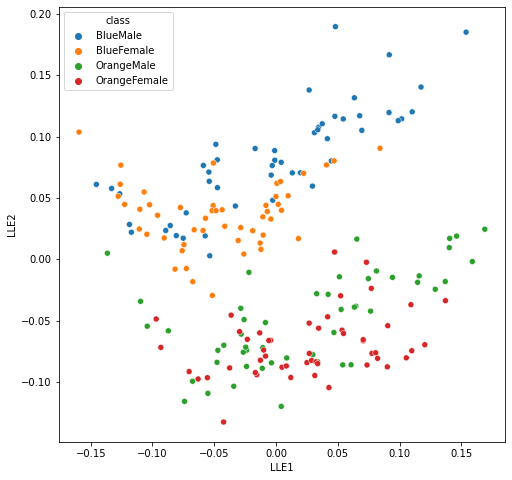

In [11]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x='LLE1',y='LLE2',hue='class',data=crabs_min_max)

### LLE with 3 Dimensions

In [12]:
lle = LocallyLinearEmbedding(n_components=3,n_neighbors=15)
crabs_lle = lle.fit_transform(crabs_min_max[data_columns])
crabs_min_max[['LLE1','LLE2','LLE3']] = crabs_lle

print('Reconstruction error: ',lle.reconstruction_error_)

Reconstruction error:  1.5214133596539796e-05


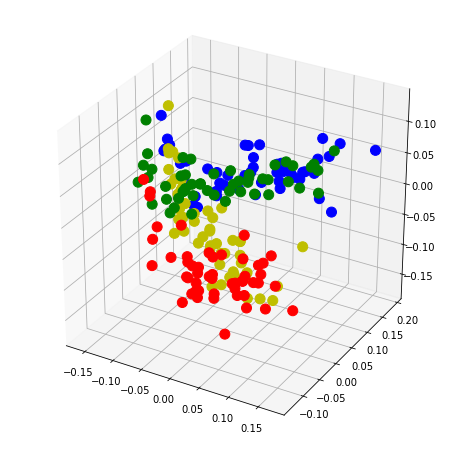

In [13]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

colors_crabs = {'BlueFemale':'y','BlueMale':'b','OrangeFemale':'r','OrangeMale':'g'}

plt.scatter(crabs_min_max.LLE1,crabs_min_max.LLE2,zs=crabs_min_max.LLE3,
            depthshade=False, c = crabs_data['class'].apply(lambda x: colors_crabs[x]),s=100)

###Using Plotly Express

In [14]:
fig = px.scatter_3d(crabs_min_max,x='LLE1',y='LLE2',z='LLE3',color='class')
fig.show()